# Master Analysis of Competing Streaming Services 

---

Analyzing and reviewing data of five competing streaming services (Amazon Prime, Apple TV, Hulu, HBO Max, and Netflix) and determining which streaming service has the highest IMDB rating and popular movie titles. This notebook aims to provide an exploratory data analysis and visulization techniques using various datasets by leveraging skills learned in Python, Jupyter, Matplotlib, and Pandas. 

In [89]:
# pip install plotly

In [90]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os 
import json
import requests
import hvplot.pandas
import plotly.express as px

# Import API key
from api_keys import geoapify_key

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1: Reading CSV Files

Files were cleaned and identified how each was orginized in seperate notebooks and saved as 'Cleaned CSV' files. DataFrames were then previewed to ensure proper import. 

In [91]:
# Read cleaned and reviewed CSV files
amazon_data = Path("Amazon_Prime_data/amazon_cleaned.csv")
apple_data = Path("Apple_data/apple_cleaned.csv")
hulu_data = Path("Hulu_data/hulu_cleaned.csv")
hbo_data = Path("HBO_data/hbo_cleaned.csv")
netflix_data = Path("Netflix_data/netflix_cleaned.csv")

# Load the data and read into DataFrames
amazon_data_df = pd.read_csv(amazon_data)
apple_data_df = pd.read_csv(apple_data)
hulu_data_df = pd.read_csv(hulu_data)
hbo_data_df = pd.read_csv(hbo_data)
netflix_data_df = pd.read_csv(netflix_data)


In [92]:
# Show the first 5 rows of each the DataFrame for Amazon Prime Data
amazon_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Blondie,movie,"Comedy, Family",1938,6.9,ZA
1,Four Rooms,movie,Comedy,1995,6.7,"AT, DE"
2,Judgment Night,movie,"Action, Crime, Drama",1993,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE..."
3,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF..."
4,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"AD, CA, ES, IN, JP"


In [93]:
# Apple TV Data
apple_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Four Rooms,movie,Comedy,1995,6.7,DE
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AU, CA, US"
2,American Beauty,movie,Drama,1999,8.3,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,GB


In [94]:
# Hulu Data
hulu_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.5,JP
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,JP
4,My Life Without Me,movie,"Drama, Romance",2003,7.4,JP


In [95]:
# HBO Max Data
hbo_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,"DK, FI, NO, SE"
1,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,"HK, ID, MY, PH, SG, TH, TW"
2,Unforgiven,movie,"Drama, Western",1992.0,8.2,"AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR, DO..."
3,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
4,A History of Violence,movie,"Action, Crime, Drama",2005.0,7.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


In [96]:
# Netflix Data
netflix_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992,8.2,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


## Streaming Service Analysis

-- 

### Part 2: Data Visualization 

After datasets were loaded and previewed, analysis was preformed. First, columns were created to identify and categorize each 'streaming service' name within the DataFrames. All DataFrames were combined into a single DataFrame. Next, IMDB rating was established and determined for each streaming service. It was determined which streaming service had the highest average IMDB rating. Various graphics using matplotlib were created to visualize the data provided for the highest rated streaming service.

In [97]:
# Add a new column to DataFrame identify the streaming service
amazon_data_df["Streaming Service"] = "Amazon"
apple_data_df["Streaming Service"] = "Apple"
hulu_data_df["Streaming Service"] = "Hulu"
hbo_data_df["Streaming Service"] = "HBO"
netflix_data_df["Streaming Service"] = "Netflix"

# Combine into a single DataFrame
all_data = pd.concat([amazon_data_df, apple_data_df, hulu_data_df, hbo_data_df, netflix_data_df], join='inner')
all_data.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
0,Blondie,movie,"Comedy, Family",1938.0,6.9,ZA,Amazon
1,Four Rooms,movie,Comedy,1995.0,6.7,"AT, DE",Amazon
2,Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE...",Amazon
3,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF...",Amazon
4,Citizen Kane,movie,"Drama, Mystery",1941.0,8.3,"AD, CA, ES, IN, JP",Amazon


#### Content Type by Streaming Service 

In [98]:
# Group by streaming service and content type, then count the occurrences
content_counts = all_data.groupby(['Streaming Service', 'Type']).size().reset_index(name='count')

# Pivot the data to get a clear view
pivot_table = content_counts.pivot(index='Streaming Service', columns='Type', values='count').fillna(0)
print(pivot_table)

Type               movie    tv
Streaming Service             
Amazon             53548  7158
Apple              12421  3541
HBO                 5826  3602
Hulu                5401  3366
Netflix            14683  4257


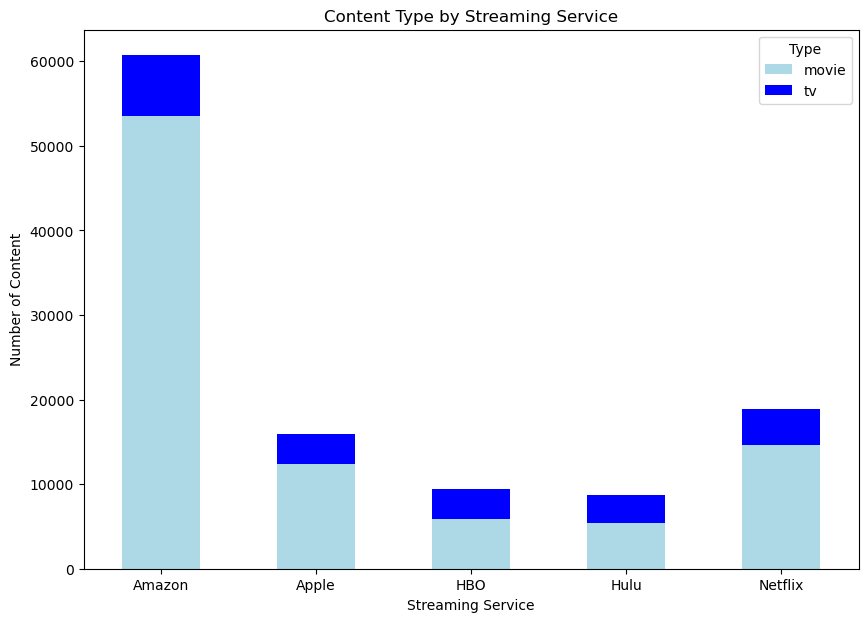

<Figure size 640x480 with 0 Axes>

In [99]:
# Plot the data
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'blue'])
plt.title('Content Type by Streaming Service')
plt.ylabel('Number of Content')
plt.xlabel('Streaming Service')
plt.xticks(rotation=0)
plt.show()

# Save the plot
plt.savefig('Content_Type_by_Streaming_Service.png')

#### IMDB Average Rating 

In [100]:
# IMDB average rating for each streaming service 
imdb_rating = all_data.groupby("Streaming Service")["IMDB Average Rating"].mean().reset_index()
imdb_rating

,Streaming Service,IMDB Average Rating
0,Amazon,5.953446
1,Apple,6.385585
2,HBO,6.688892
3,Hulu,6.566648
4,Netflix,6.398585


In [101]:
# Print which is the highest rated streaming service
highest_rated = imdb_rating.loc[imdb_rating["IMDB Average Rating"].idxmax()]
print(f"The highest rated streaming service is {highest_rated['Streaming Service']} with an average rating of {highest_rated['IMDB Average Rating']}")

The highest rated streaming service is HBO with an average rating of 6.688891506655672


WRITTEN ANALYSIS HERE. 
1. Which streaming service is most popular based on IMBD rating and why. Go into a detailed analysis here and why we think this is. Is there a reason. 

#### Highest Average Rating 

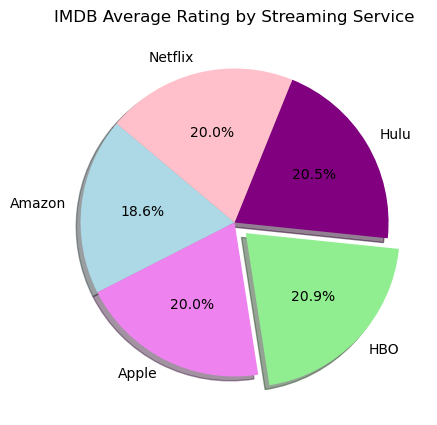

In [102]:
# Create a pie chart of all the streaming services to show which one has the highest average rating IMDB rating
imdb_rating.plot.pie(y="IMDB Average Rating", 
                     labels=imdb_rating["Streaming Service"], 
                     autopct="%1.1f%%", title="IMDB Average Rating by Streaming Service", 
                     figsize=(5, 5), legend=False, shadow=True, explode=(0, 0, 0.1, 0, 0), 
                     startangle=140, colors=["lightblue", "violet", "lightgreen", "purple", "pink"]) 
plt.ylabel('')

# Save the pie chart
plt.savefig("Images/IMDB_Average_Rating_by_Streaming_Service.png")

WRITTEN ANALYSIS HERE. 
1. Go into analysis here about the pie chart. Disucss which one has the highest rating. 

## HBO Max Data Analysis and Visualization 

After determining that HBO Max was the most popular streaming service in regards to the highest IMDB rating, we then took the data given and analyzed it further. Here, we looked at the number of movie and tv shows, top 10 movies and tv shows, and most popular genres to better understand why HBO Max out-performed the other streaming services. 

#### Number of Movies and TV Shows for HBO Max

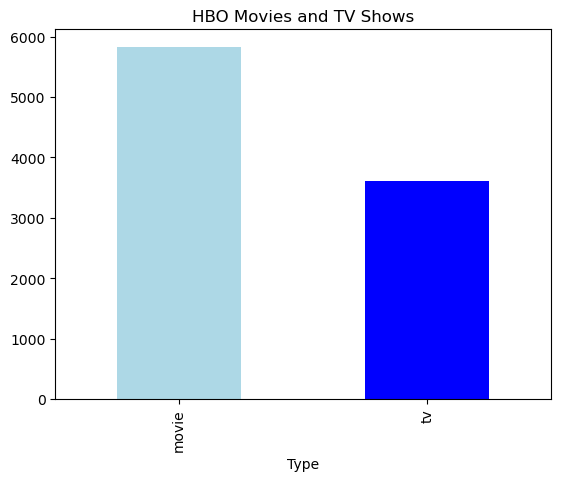

In [103]:
# Create a bar chat to show the number of movies and TV shows for HBO
hbo_data_df["Type"].value_counts().plot(kind="bar", 
                                        title="HBO Movies and TV Shows", 
                                        color=["lightblue", "blue"])

# save the bar chart
plt.savefig("Images/HBO_Movies_and_TV_Shows.png")

#### Top 10 Genres for Movies 

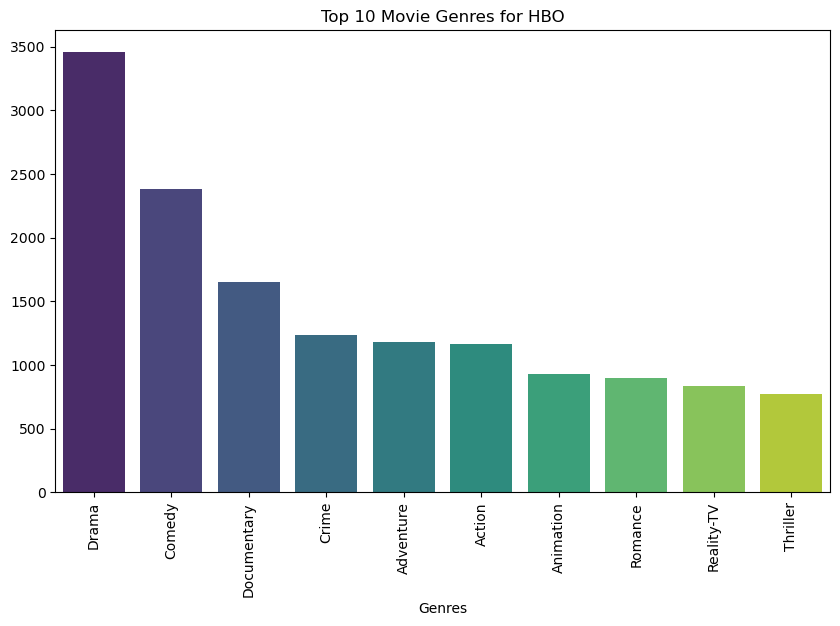

<Figure size 640x480 with 0 Axes>

In [104]:
# Filter the data to include only movies
hbo_movies = hbo_data_df[hbo_data_df['Type'] == 'movie']

# Split the by genres and explode the dataframe so each genre has its own row
hbo_genres = hbo_data_df['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in movies for HBO
top_movie_genres = hbo_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for movies for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values, palette="viridis")
plt.title("Top 10 Movie Genres for HBO")
plt.xticks(rotation=90);
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_Movie_Genres_HBO.png")


#### Top 10 Genres for TV Shows

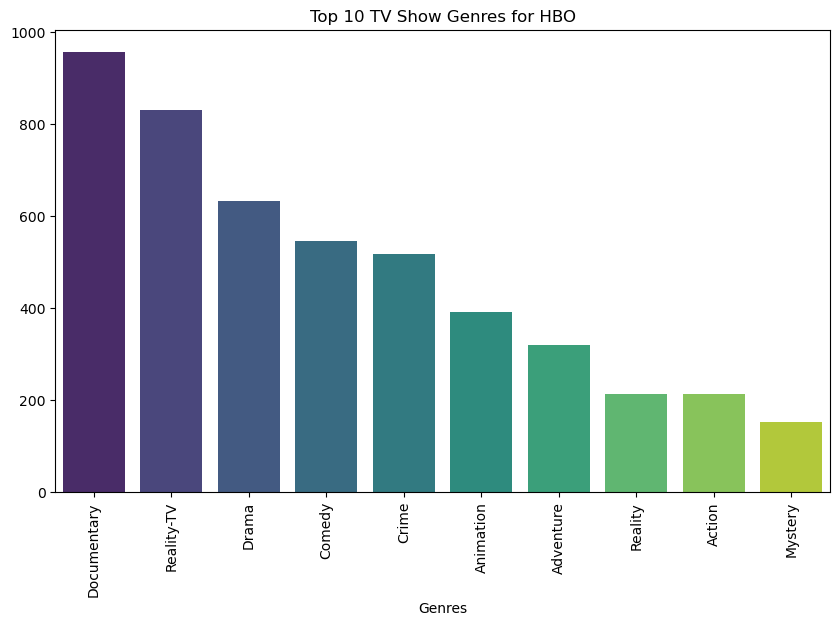

<Figure size 640x480 with 0 Axes>

In [105]:
# Filter the data to include only TV shows
hbo_tv = hbo_data_df[hbo_data_df['Type'] == 'tv']

# Split the genres and explode the dataframe so each genre has its own row
hbo_tv_genres = hbo_tv['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in TV shows for HBO
top_tv_genres = hbo_tv_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for TV shows for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_genres.index, y=top_tv_genres.values, palette="viridis")
plt.title("Top 10 TV Show Genres for HBO")
plt.xticks(rotation=90)
plt.show()

# Save the bar chart
plt.savefig("Images/Top_10_TV_Genres_HBO.png")

WRITTEN ANALYSIS HERE FOR HBO 
1. Discuss the bar chart and which one is most popular out of tv or movies. Why? 
2. Discuss HBO movies by genre. Which genre is most popular. 

## Data Visualization of the Least Popular Streaming Service  

Amazon Prime was considered the least popular streaming service based on the data obtained. However, there was not enough data available to us to properly analyze in order to determined how to improve the streaming service. We took the second least popular streaming service, Netflix, and analyzed various aspects of the service to better understand why it is not performing well. Here, we reviewed the data to determined how Netflix can improve in the future and what aspects to look for regarding demographic information (gender, age, location by country, and devices used) and membership analysis (subscription plan and user length). 

A new dataset and csv file were provided, cleaned, and analyzed. 

In [106]:
# Load new CSV file
netflix_userbase = Path("csv_folder/Netflix_Userbase.csv")

# Read the CSV file into a DataFrame
netflix_userbase_df = pd.read_csv(netflix_userbase)
netflix_userbase_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [107]:
# Check for NaN values
print("NaN count per column:")
print(netflix_userbase_df.isnull().sum())

# Get rows with NaN
rows_with_nan = netflix_userbase_df[netflix_userbase_df.isnull().any(axis=1)]
print("\nRows with NaN values:")
print(rows_with_nan)

NaN count per column:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
dtype: int64

Rows with NaN values:
Empty DataFrame
Columns: [User ID, Subscription Type, Monthly Revenue, Join Date, Last Payment Date, Country, Age, Gender, Device]
Index: []


#### Statistical Summary

In [123]:
# Basic statistics summary of the data
print("\nSummary statistics:")

# Calculate the average age, mean, std, max, min, and quartiles
age_mean = netflix_userbase_df["Age"].mean()
age_median = netflix_userbase_df["Age"].median()
age_std = netflix_userbase_df["Age"].std()
age_max = netflix_userbase_df["Age"].max()
age_min = netflix_userbase_df["Age"].min()
age_q1 = netflix_userbase_df["Age"].quantile(0.25)

# Print the summary
print(f"Average Age: {age_mean}")
print(f"Median Age: {age_median}")
print(f"Standard Deviation: {age_std}")
print(f"Max Age: {age_max}")
print(f"Min Age: {age_min}")
print(f"Q1: {age_q1}")



Summary statistics:
Average Age: 38.808604744672294
Median Age: 39.0
Standard Deviation: 7.17253454179234
Max Age: 51
Min Age: 27
Q1: 32.0


### Demographic Information on Netflix Users

#### Gender Distribution 

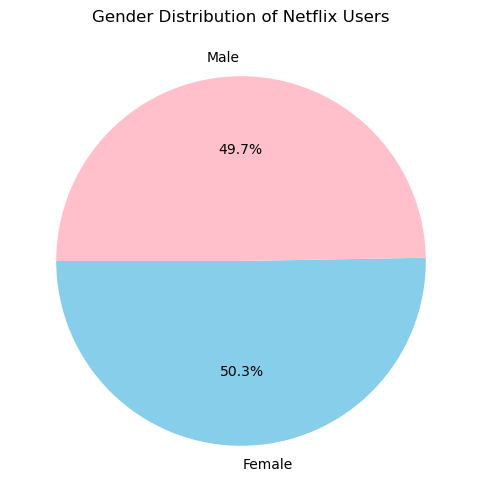

<Figure size 640x480 with 0 Axes>

In [109]:
# Gender distribution of Netflix users
gender_distribution = netflix_userbase_df['Gender'].value_counts()

# Create a pie chart for the gender distribution of Netflix users
gender_distribution.plot.pie(labels=gender_distribution.index, autopct='%1.1f%%', 
                             title='Gender Distribution of Netflix Users', 
                             figsize=(6, 6), legend=False, startangle=180, 
                             colors=['skyblue', 'pink'])
plt.ylabel('')

# Show the plot
plt.show()

# Save the pie chart
plt.savefig("Images/Gender_Distribution_of_Netflix_Users.png")

#### Age Distribution 

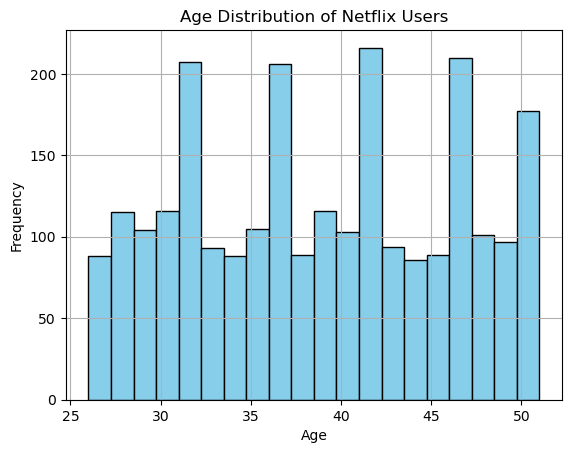

<Figure size 640x480 with 0 Axes>

In [110]:
# Create a histogram to show the age distribution of Netflix users
plt.hist(netflix_userbase_df['Age'], bins=20, color='skyblue', edgecolor='black')

# Graph properties
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Save the histogram
plt.savefig("Images/Age_Distribution_of_Netflix_Users.png")

In [111]:
# What is the average distribution of Netflix users
average_age = netflix_userbase_df['Age'].mean()
print(f"The average age of Netflix users is {average_age}")

The average age of Netflix users is 38.7956


#### Netflix Users by Country 

In [112]:
# Country distribution of Netflix users
country_distribution = netflix_userbase_df['Country'].value_counts()
country_distribution


Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

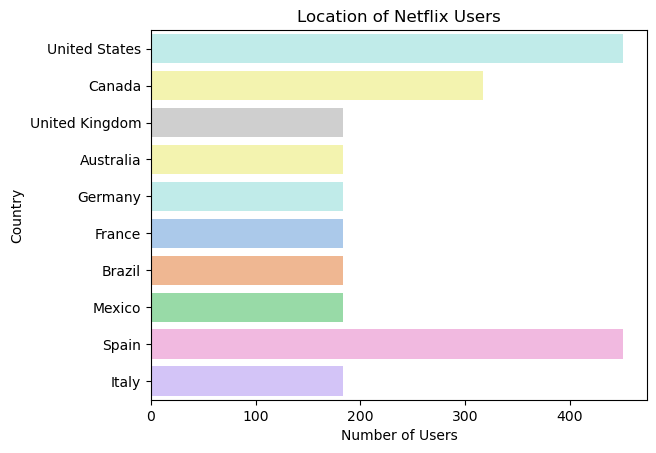

<Figure size 640x480 with 0 Axes>

In [113]:
# Analyze the location/country distribution of Netflix users
sns.countplot(y="Country", data=netflix_userbase_df, palette="pastel", order = netflix_userbase_df['Country'])
plt.title("Location of Netflix Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()

# Save the bar chart
plt.savefig("Images/Location_of_Netflix_Users.png")

In [114]:
# Create a new DataFrame for the country counts
country_counts = netflix_userbase_df['Country'].value_counts().reset_index(name='Count')
country_counts.columns = ['Country', 'Count']

# Bubble map using Plotly
fig = px.scatter_geo(country_counts, locations="Country", locationmode='country names', size="Count", hover_name="Country", title="Netflix Users by Country", projection="natural earth")
fig.show()

#### Devices Used by Netflix Users 

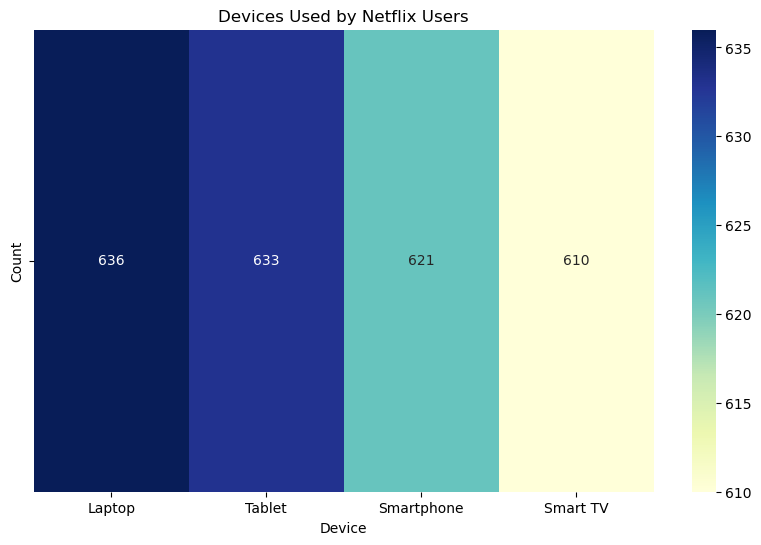

<Figure size 640x480 with 0 Axes>

In [115]:
# Devices used by Netflix users
device_distribution = netflix_userbase_df['Device'].value_counts().reset_index()
device_distribution.columns = ['Device', 'Count']

# Create a heat map for the devices used
plt.figure(figsize=(10, 6))
sns.heatmap(device_distribution.set_index('Device').T, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Devices Used by Netflix Users')
plt.xlabel('Device')
plt.ylabel('')

# Show the plot
plt.show()

# Save the heat map
plt.savefig("Images/Devices_Used_by_Netflix_Users.png")

### Membership Analysis of Netflix Users

In [116]:
# Analyze the membership length of Netflix users
netflix_userbase_df['Join Date'] = pd.to_datetime(netflix_userbase_df['Join Date'])
netflix_userbase_df['Last Payment Date'] = pd.to_datetime(netflix_userbase_df['Last Payment Date'])

# Calculate the membership length
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Last Payment Date'] - netflix_userbase_df['Join Date']
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Membership Length'].dt.days

print(f'The average membership length of Netflix users is {netflix_userbase_df["Membership Length"].mean()} days')

The average membership length of Netflix users is 326.102 days


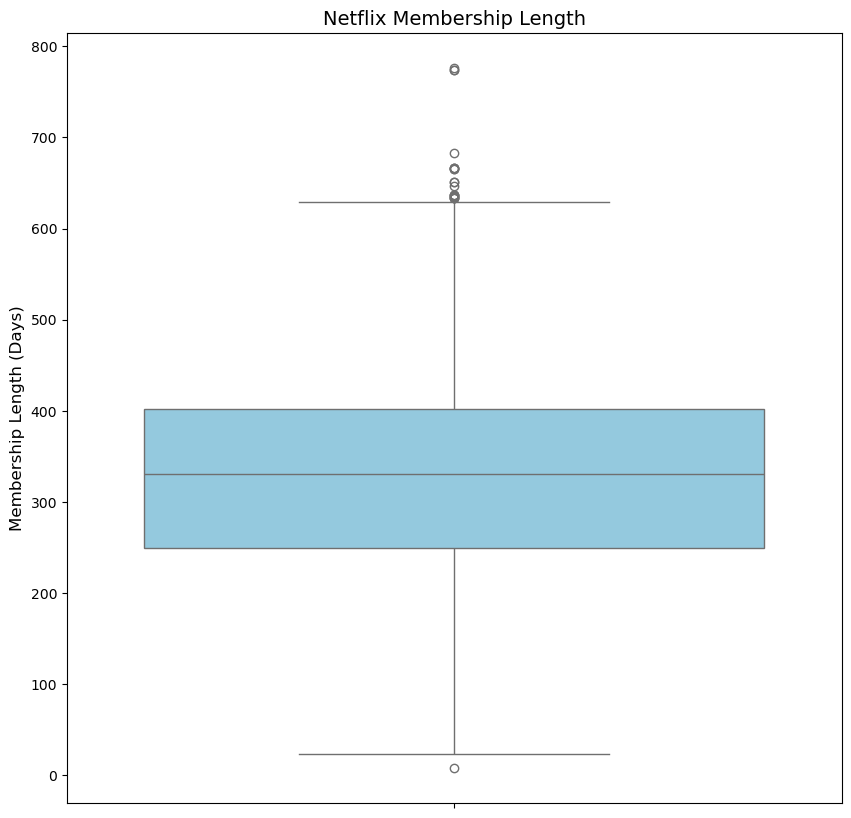

<Figure size 640x480 with 0 Axes>

In [117]:
# Data Visualization
# Filter out negative membership lengths
netflix_userbase_df = netflix_userbase_df[netflix_userbase_df['Membership Length'] >= 0]

# Create a box and whisker plot for the membership length of Netflix users
plt.figure(figsize=(10, 10))
sns.boxplot(y=netflix_userbase_df['Membership Length'], color='skyblue')
plt.title('Netflix Membership Length', fontsize=14)
plt.ylabel('Membership Length (Days)', fontsize=12)

# Show the plot
plt.show()

# Save the box and whisker plot
plt.savefig("Images/Netflix_Membership_Length.png")


WRITTEN ANALYSIS HERE 

#### Subscription Plan Type of Netflix Users

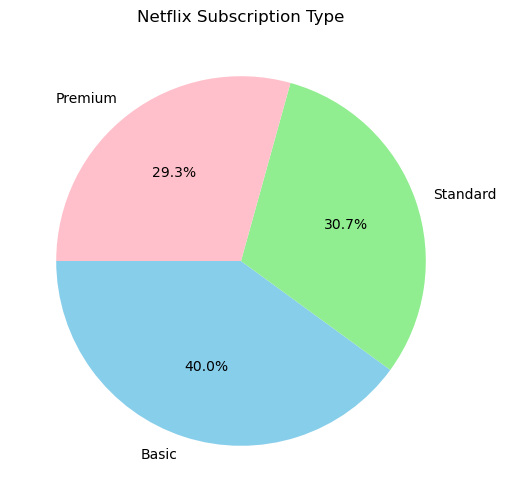

<Figure size 640x480 with 0 Axes>

In [118]:
# Analyze the subscription plan of Netflix users
subscription_plan = netflix_userbase_df['Subscription Type'].value_counts().reset_index()
subscription_plan.columns = ['Subscription Type', 'Count']

# Create a pie chart for the subscription plan of Netflix users
subscription_plan.plot.pie(y='Count', labels=subscription_plan['Subscription Type'], autopct='%1.1f%%', 
                          title='Netflix Subscription Type', figsize=(6, 6), legend=False, startangle=180, 
                          colors=['skyblue', 'lightgreen', 'pink'])
plt.ylabel('')
plt.show()

# Save the pie chart
plt.savefig("Images/Netflix_Subscription_Type.png")

WRITTEN ANALYSIS HERE. 
1. answer quesitons above based on data (plan duration, cost, age, gender, peak growth year)

Sources: Data was extracted from Kaggle(2025) from OctopusTeam Dataset. All data maintained and developed from OctopusTeam. Data was used for educational purposes only.